In [107]:
import pandas as pd

In [108]:
data = pd.read_csv('Federal Firefighting Costs (Suppression Only).csv' )

In [109]:
data['Year'] = pd.to_datetime(data['Year'] , format ='%Y')
data['Year'].dtype

dtype('<M8[ns]')

In [121]:
data.head()

,Year,Fires,Acres,ForestService,DOIAgencies,Total,fires per acre
0,1985-01-01,82591,2896147,161505000,78438000,239943000,0.028518
1,1986-01-01,85907,2719162,111625000,91153000,202778000,0.031593
2,1987-01-01,71300,2447296,253657000,81452000,335109000,0.029134
3,1988-01-01,72750,5009290,429609000,149317000,578926000,0.014523
4,1989-01-01,48949,1827310,331672000,168115000,499787000,0.026787


In [111]:
data['Fires'] = [int(i.replace(',','')) for i in data['Fires']]
data['Acres'] = [int(i.replace(',','')) for i in data['Acres']]
data['ForestService'] = [int(i.replace(',','').replace('$','')) for i in data['ForestService']]
data['DOIAgencies'] = [int(i.replace(',','').replace('$','')) for i in data['DOIAgencies']]
data['Total'] = [int(i.replace(',','').replace('$','')) for i in data['Total']]

In [112]:
data.shape

(36, 6)

In [114]:
data.isnull().sum()

Year             0
Fires            0
Acres            0
ForestService    0
DOIAgencies      0
Total            0
dtype: int64

Text(0.5, 1.0, 'Fires from year 1983 to 2020')

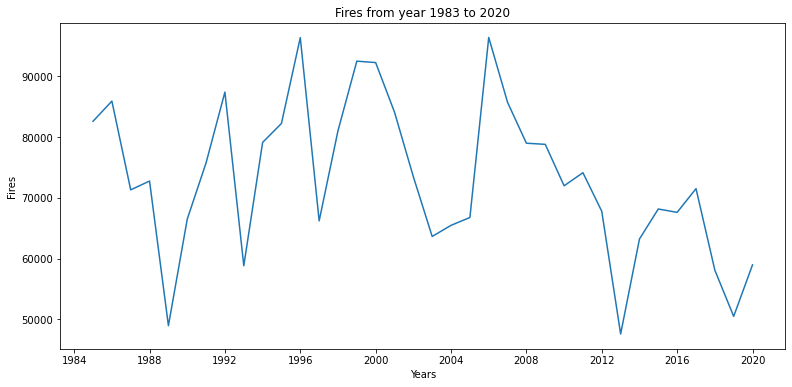

In [153]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize = (13,6))
x = data['Year']
y = data['Fires']
ax.set_xlabel('Years')
ax.set_ylabel('Fires')
plt.plot( x , y )
plt.title('Fires from year 1983 to 2020')

In [142]:
data['fires per acre'] = data['Fires'] / data['Acres']

Text(0.5, 1.0, 'fires affects per acre wildlife')

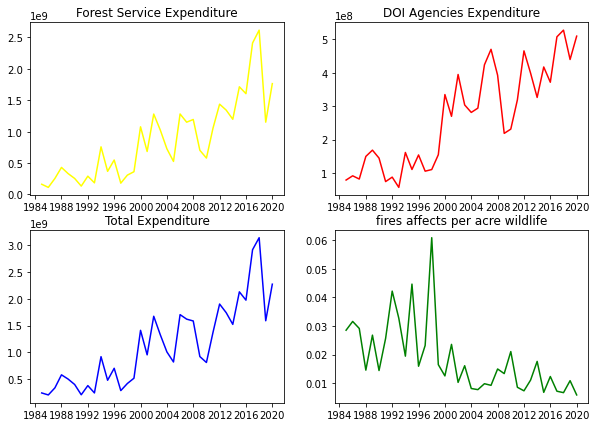

In [143]:
fig , ax = plt.subplots(2 , 2 , figsize=(10,7))
x = data['Year']
y = data['ForestService']
ax[0,0].plot( x , y, color= 'yellow' )
ax[0,0].set_title('Forest Service Expenditure')

x = data['Year']
y = data['DOIAgencies']
ax[0,1].plot( x , y , color = 'red')
ax[0,1].set_title('DOI Agencies Expenditure')

x = data['Year']
y = data['Total']
ax[1,0].plot( x , y , color='blue' )
ax[1,0].set_title('Total Expenditure')


x = data['Year']
y = data['fires per acre']
ax[1,1].plot( x , y , color = 'green' )
ax[1,1].set_title('fires affects per acre wildlife')


In [144]:
data['Total'].corr(data['fires per acre'])

-0.6693387055181311

Text(0.5, 1.0, 'correlation between fires per acres and Total Expenditure')

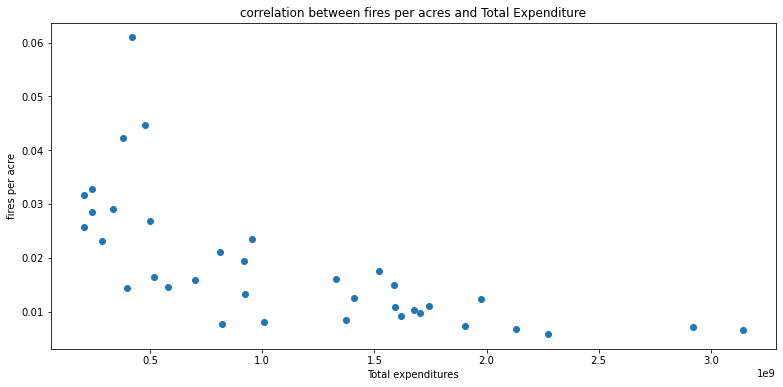

In [154]:
fig , ax = plt.subplots(figsize = (13,6))
x = data['Total']
y = data['fires per acre']
ax.set_xlabel('Total expenditures')
ax.set_ylabel('fires per acre')
plt.scatter( x , y )
plt.title('correlation between fires per acres and Total Expenditure')

In [145]:
data['ForestService'].corr(data['fires per acre'])

-0.6434257165415465

Text(0.5, 1.0, 'correlation between fires per acres and Forest service expenditure')

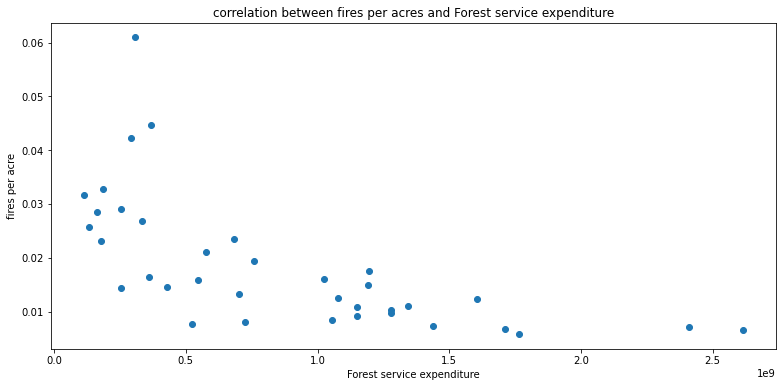

In [155]:
fig , ax = plt.subplots(figsize = (13,6))
x = data['ForestService']
y = data['fires per acre']
ax.set_xlabel('Forest service expenditure')
ax.set_ylabel('fires per acre')
plt.scatter( x , y )
plt.title('correlation between fires per acres and Forest service expenditure')

In [148]:
data['DOIAgencies'].corr(data['fires per acre'])

-0.7365811127649525

Text(0.5, 1.0, 'correlation between fires per acres and Forest DOI Agencies Expenditure')

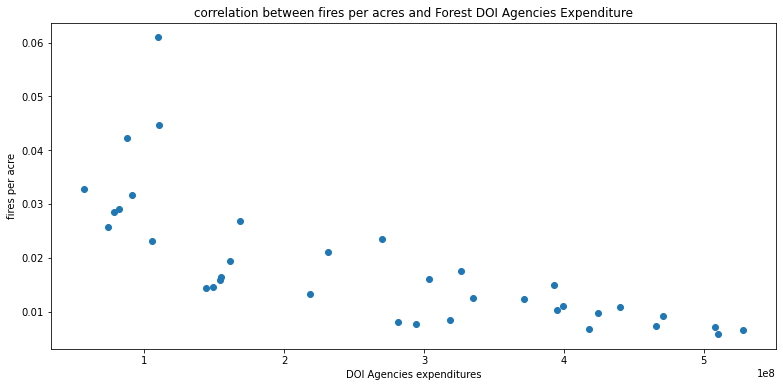

In [158]:
fig , ax = plt.subplots(figsize = (13,6))
x = data['DOIAgencies']
y = data['fires per acre']
ax.set_xlabel('DOI Agencies expenditures')
ax.set_ylabel('fires per acre')
plt.scatter( x , y )
plt.title('correlation between fires per acres and Forest DOI Agencies Expenditure')

<AxesSubplot:>

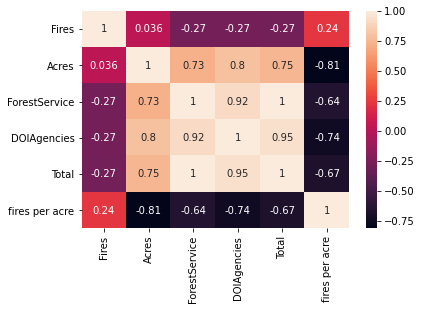

In [151]:
import seaborn as sns
sns.heatmap(data.corr(),annot =True)